# Visualizing Supervised Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    15  100    15    0     0     60      0 --:--:-- --:--:-- --:--:--    60


In [4]:
import pandas as pd
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [5]:
df.head()

,404: Not Found


In [6]:
df.describe()

,404: Not Found
count,0
unique,0


In [7]:
import matplotlib.pyplot as plt
plt.xkcd()

import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=120, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

ValueError: a must be greater than 0

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [13]:
y=df['group']

In [14]:
df.drop('group', axis='columns', inplace=True)

In [15]:
X = df.as_matrix()

In [16]:
corrmat = df.corr()

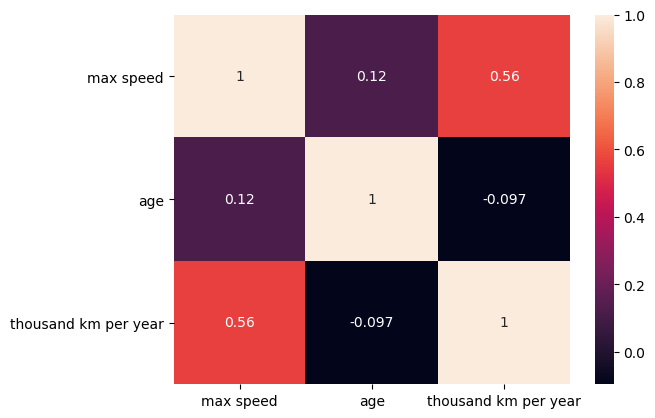

In [17]:
matplotlib.rcdefaults();
sns.heatmap(corrmat, annot=True)

## We restrict ourselves to two dimensions for now

In [18]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.xkcd()

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

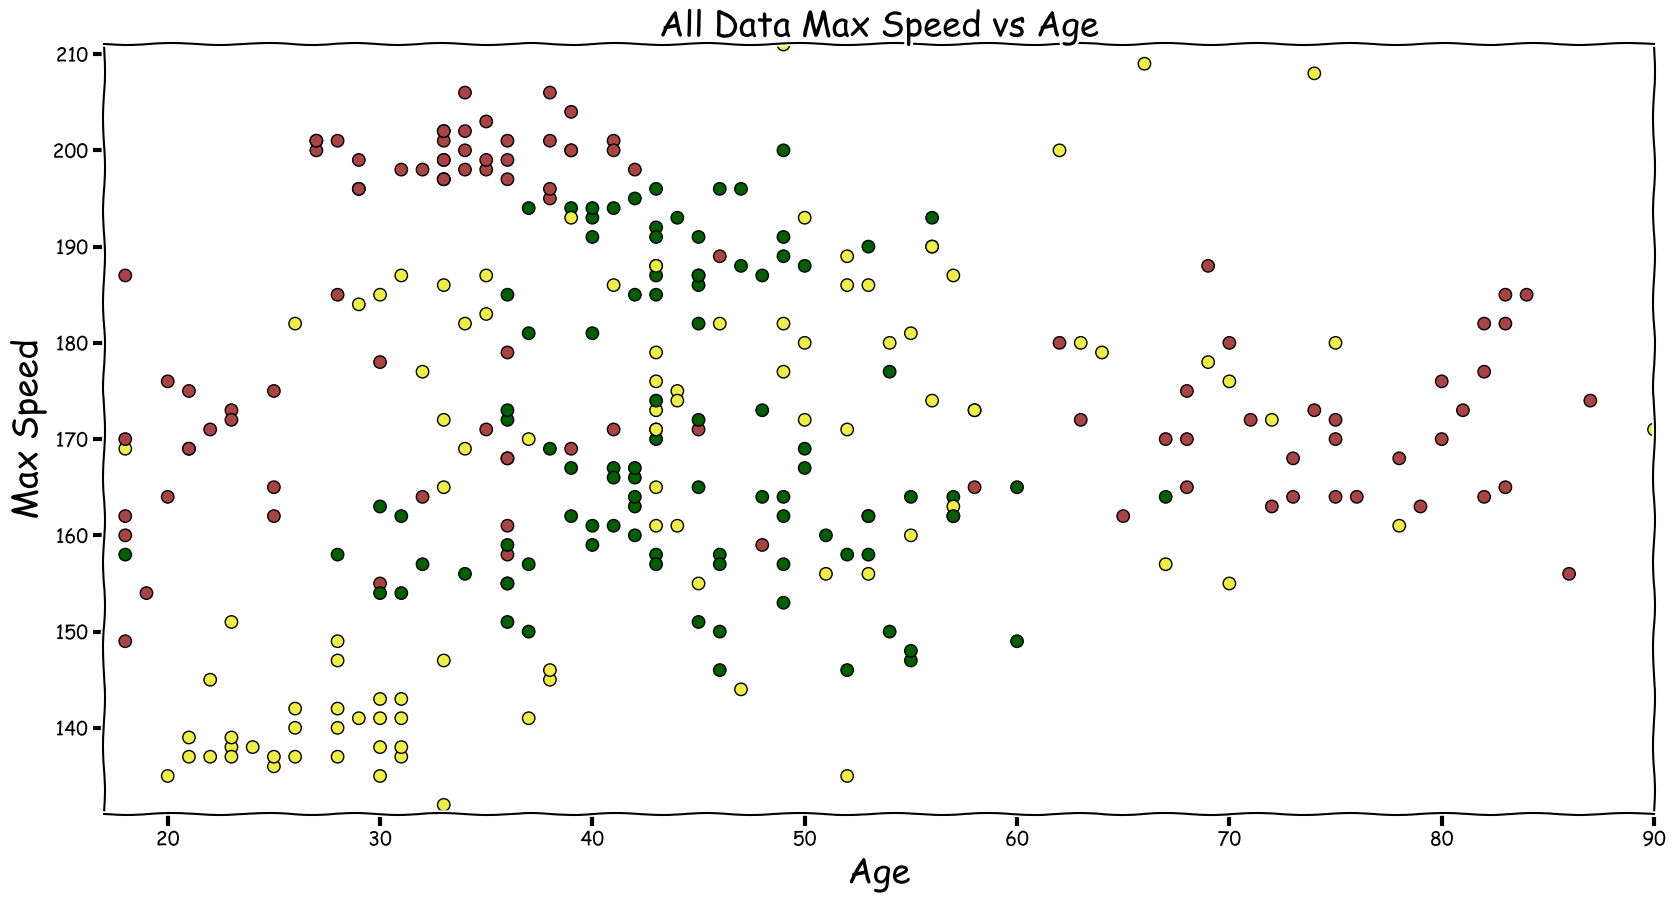

In [19]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data Max Speed vs Age")

## Second important concept: To have an idea how well the training worked, we save same data to try our model on previously unseen data. How well it performs on this test data as opposed to the training data tells us quite a bit as well.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 3), (180,), (120, 3), (120,))

In [23]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

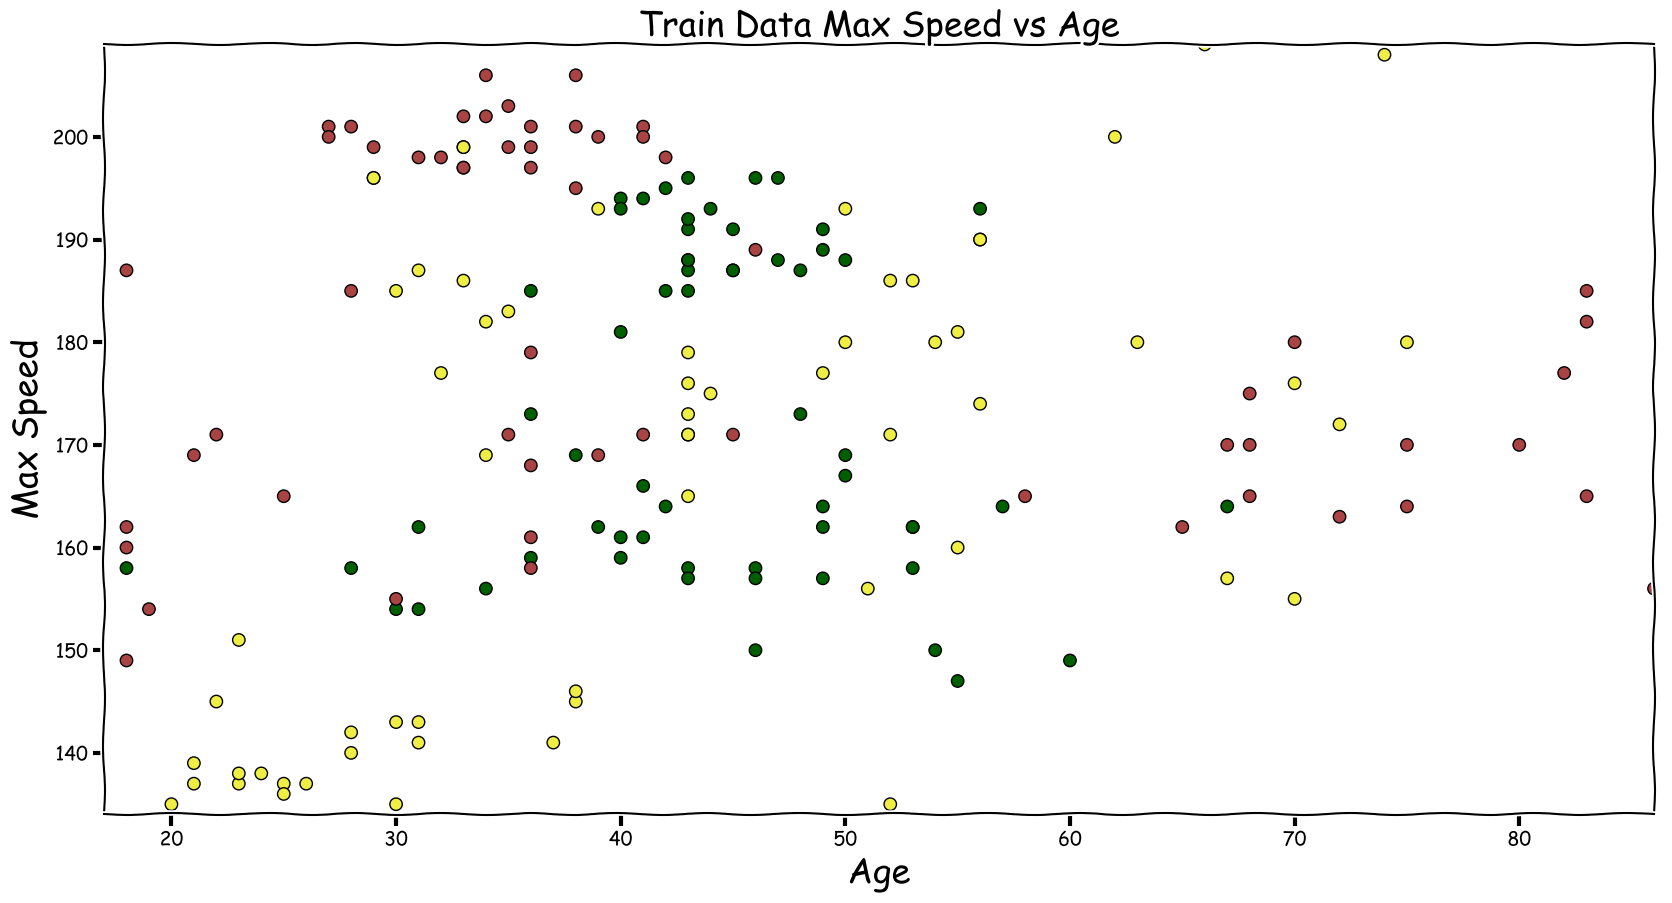

In [24]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data Max Speed vs Age")

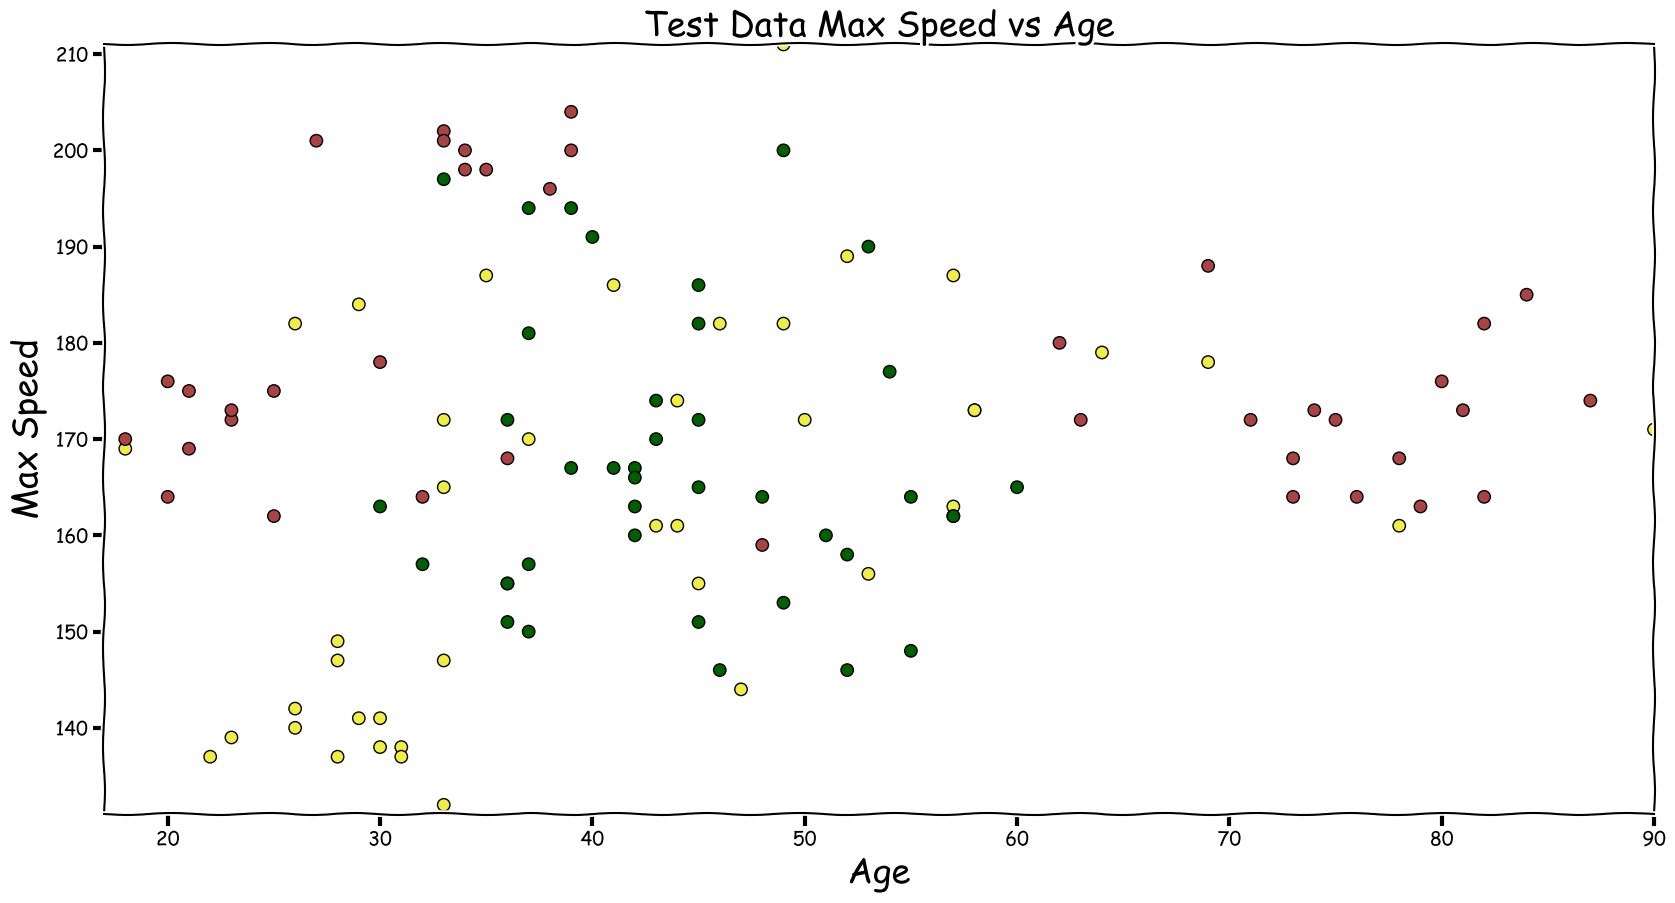

In [25]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data Max Speed vs Age")

## Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [26]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)

In [27]:
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

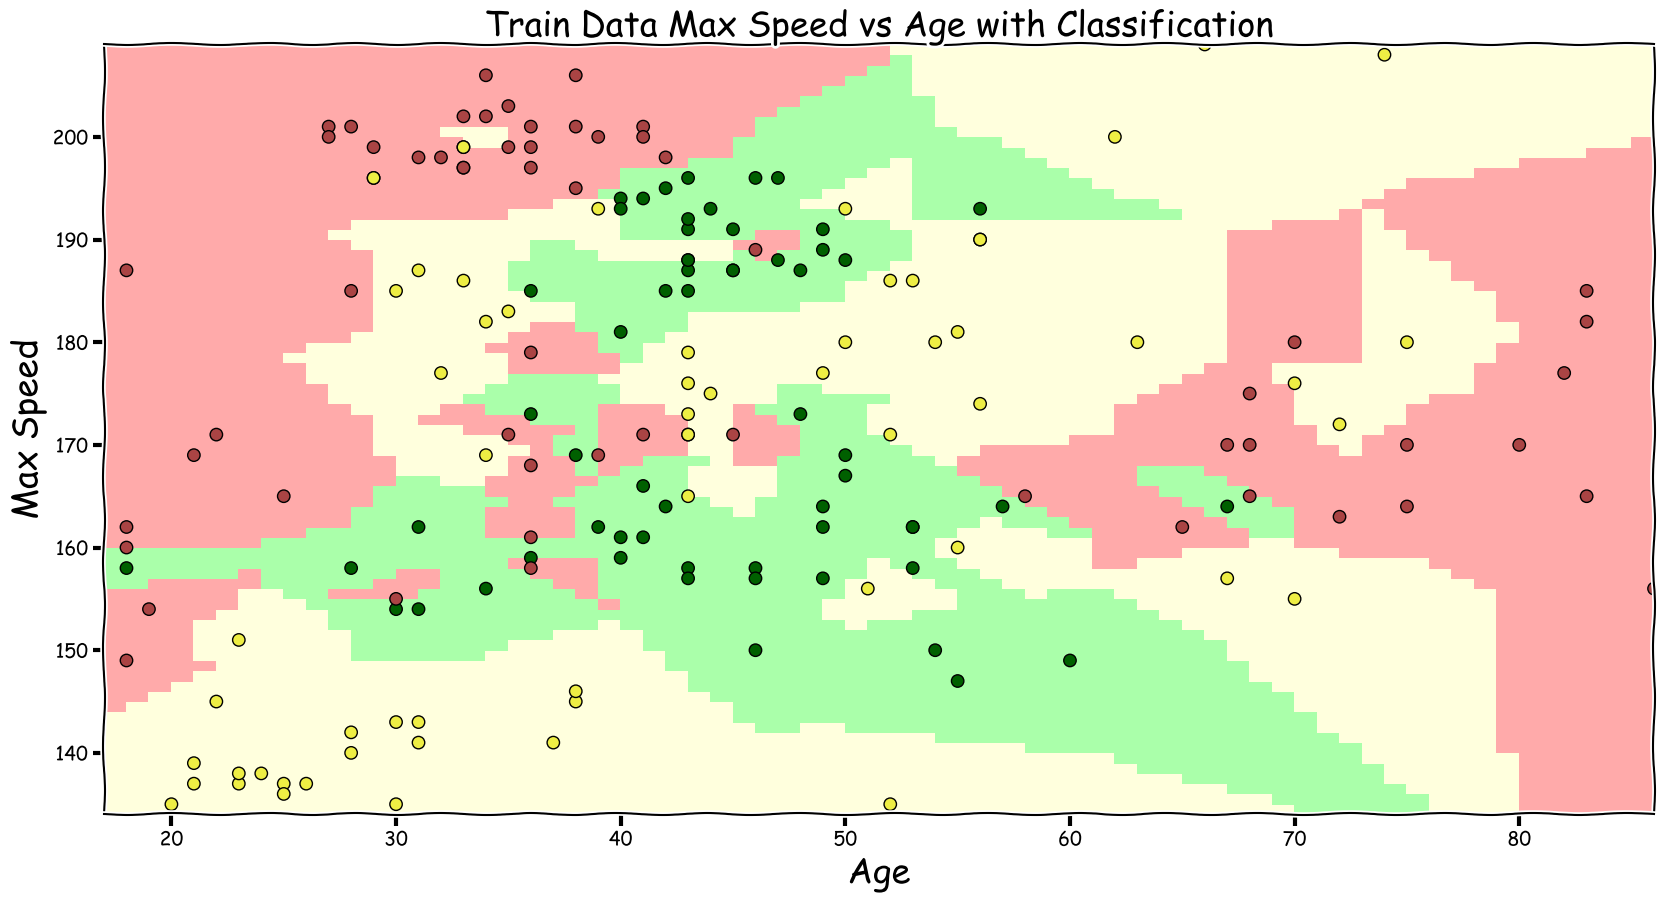

In [28]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [29]:
clf.score(X_train_2_dim, y_train)

0.9777777777777777

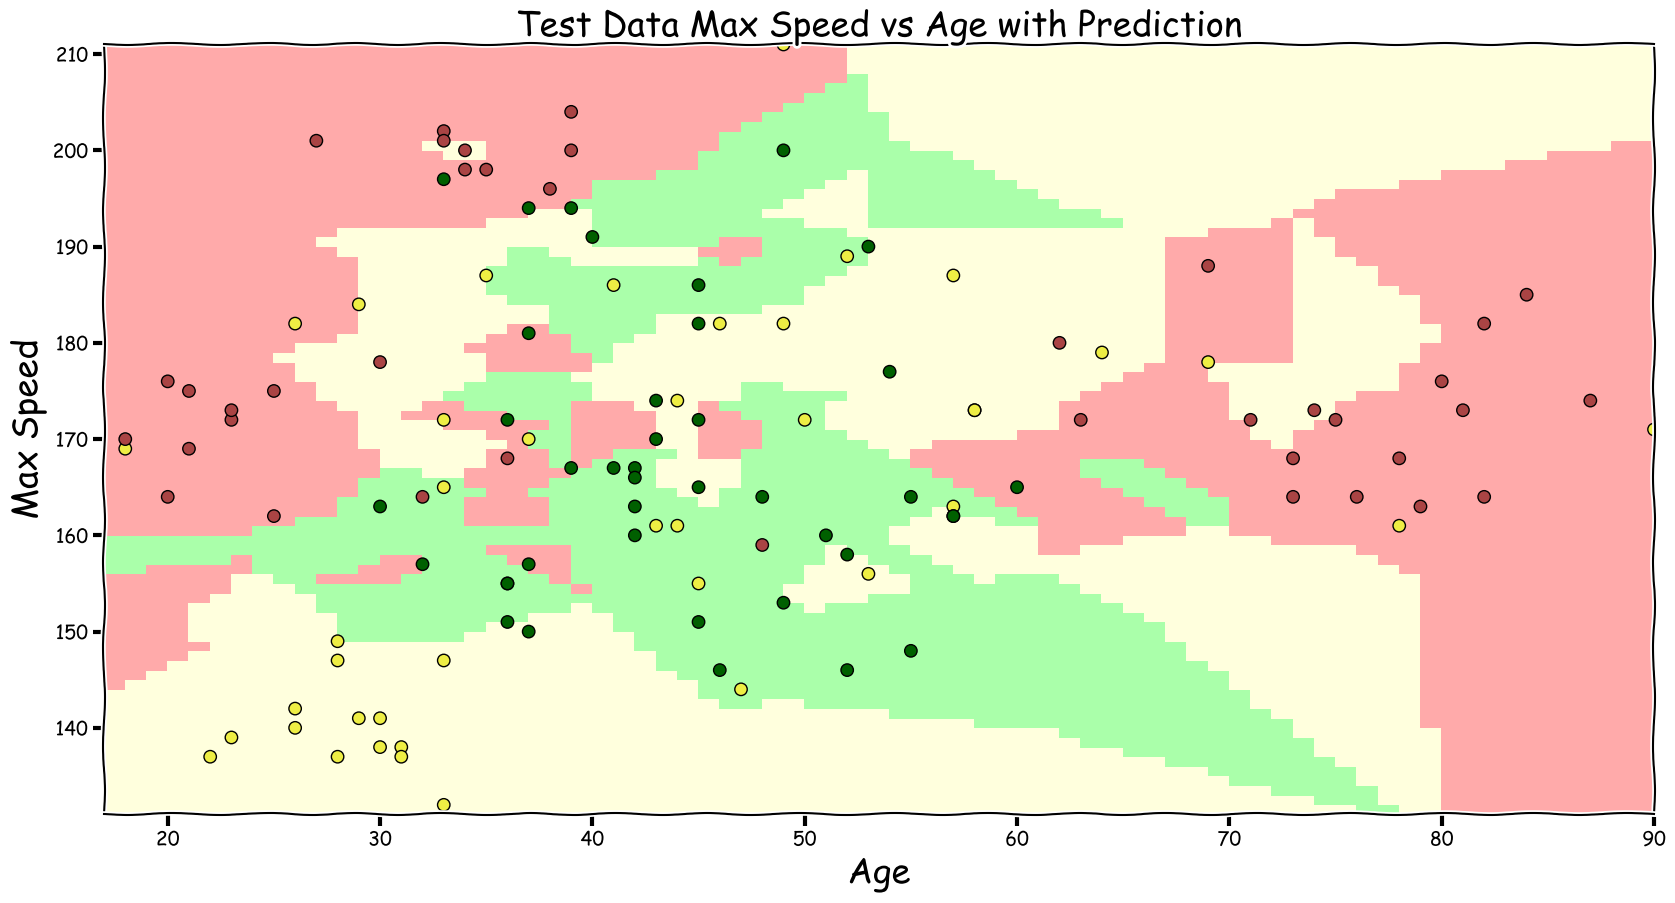

In [30]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [31]:
clf.score(X_test_2_dim, y_test)

0.65

## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided.

### In KNN we reduce overfitting by taking more neighbors into account

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
%time clf.fit(X_train_2_dim, y_train)

In [ ]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [ ]:
clf.score(X_train_2_dim, y_train)

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [ ]:
clf.score(X_test_2_dim, y_test)

## Fourth Step: Sample Usage and Confusion Matrix

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
%time clf.fit(X_train, y_train)

In [ ]:
sample_X = X[:1]
sample_X

In [ ]:
y[:1]

In [ ]:
clf.predict(sample_X)

In [ ]:
clf.predict_proba(sample_X)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X)
y_true = np.array(y)
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
# 0: red
# 1: green
# 2: yellow

import seaborn as sns
sns.heatmap(cm, annot=True, cmap="YlGnBu")
figure = plt.gcf()
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction', fontsize=20)
ax.set_ylabel('Ground Truth', fontsize=20)